## Bring the Avengers!
libraries that will ease our data analysis

In [1]:
import matplotlib
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt # default library for making plots
import seaborn as sns # for making prettier plots!
import datetime
import math

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None) # to see all columns in the pd dataframe
%config InlineBackend.figure_format = 'retina' # for the crispier version of plots for retina screens

matplotlib.style.use('ggplot')
plt.rcParams['figure.figsize'] = [12.0, 6.0]

## Importing the Dataset

In [2]:
filename = 'data/database_main.xls'

data = pd.read_excel(filename, sheet_name="main")
print("Loaded db successfully!")

Loaded db successfully!


## Building new columns and sanitising the data
Firstly we will be removing the activity where there were no steps recorded. For sleep data, we will clear out rows where there was no "Deep Sleep" entries

In [3]:
dayCodes = ['', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
minDayCodes = ['', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

days = {1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat', 7: 'Sun'}

def is_nan(x):
    return (x is np.nan or x != x)

def defineSleepBucket(row):
    sleepEntry = row['Sleep Start time']
    if not is_nan(sleepEntry):
        sleepTimeO = datetime.datetime.strptime(sleepEntry, '%Y-%m-%dT%H:%M:%S.000').time()        
        if sleepTimeO.minute > 30:
            return (sleepTimeO.hour + 1)
            #return '{}:{}'.format(str((sleepTimeO.hour + 1)), '00')
        elif sleepTimeO.minute > 0:
            return sleepTimeO.hour + 0.5
            #return '{}:{}'.format(str(sleepTimeO.hour), ':30')
    else:
        return np.nan
    
def defineAwakeBucket(row):
    awakeEntry = row['Sleep End time']
    if not is_nan(awakeEntry):
        awakeEntryO = datetime.datetime.strptime(awakeEntry, '%Y-%m-%dT%H:%M:%S.000').time()        
        if awakeEntryO.minute > 30:
            return (awakeEntryO.hour + 1)
            #return '{}:{}'.format(str((awakeEntryO.hour + 1)), '00')
        elif awakeEntryO.minute > 0:
            return awakeEntryO.hour + 0.5
            #return '{}:{}'.format(str(awakeEntryO.hour), ':30')
    else:
        return np.nan    

#remove all entries where there was no steps recorded. i.e no activity
data = data[data['Steps'].notnull()]

data['Days of Week'] = data['Day of Week'].apply(lambda x: days[x])

#Build additional Sleep columns
data['Sleep Bucket'] = data.apply(defineSleepBucket, axis=1)
data['Awake Bucket'] = data.apply(defineAwakeBucket, axis=1)

data['% Awake'] = 100 - (data['% Deep sleep'] + data['% REM sleep'] + data['% Light sleep'])
data['% Restorative sleep'] = data['% Deep sleep'] + data['% REM sleep']

#remove all entries where there was no Deep sleep recorded
sleepData = data[data['% Deep sleep'].notnull()]

In [4]:
print("Contains {} records ranging from {} to {}".format(str(len(data)), str(data.iloc[0]['Date']), str(data.iloc[-1]['Date'])))
print('Contains {} entries of Sleep data'.format(len(sleepData)))

data.head()

Contains 106 records ranging from 2018-06-24 to 2018-10-07
Contains 69 entries of Sleep data


,Date,Day of Week,Is Weekday,Is Weekend,Calories Burned,Calories BMR,Steps,Distance (Km),Elevation (Ft),Resting Heart Rate,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,Active Score,Cardio minutes,Cardio calories,Fat Burn minutes,Fat Burn calories,Peak minutes,Peak calories,Normal Cardio calories,Normal Cardio minutes,Sleep Efficiency,Minutes Asleep,Minutes to fall asleep,Sleep Start time,Sleep End time,Time in bed,Minutes Deep sleep,Deep sleep count,Minutes Light sleep,Light sleep count,Minutes REM sleep,REM sleep count,Minutes Awake,Minutes Awake count,% Deep sleep,% Light sleep,% REM sleep,Days of Week,Sleep Bucket,Awake Bucket,% Awake,% Restorative sleep
0,2018-06-24,7,False,True,1996,1690,3367,3.01,0.00,59.0,0,1377,47,2,14,362,-1,11.0,133.10892,14.0,89.20880,0.0,0.0,446.51352,284.0,92.0,379.0,0.0,2018-06-24T22:17:00.000,2018-06-25T05:28:30.000,431.0,56.0,2.0,244.0,26.0,79.0,6.0,52.0,25.0,13.0,57.0,19.0,Sun,22.5,5.5,11.0,32.0
1,2018-06-25,1,True,False,2863,1685,8394,5.55,36.58,58.0,12,709,244,42,14,1361,-1,2.0,12.40518,94.0,514.11279,0.0,0.0,2311.92765,1326.0,95.0,333.0,0.0,2018-06-25T22:49:30.000,2018-06-26T05:16:30.000,387.0,75.0,3.0,214.0,27.0,44.0,7.0,54.0,30.0,20.0,56.0,12.0,Mon,23.0,5.5,12.0,32.0
2,2018-06-26,2,True,False,3398,1683,13569,9.68,24.38,57.0,8,687,231,33,102,2004,-1,10.0,103.59112,187.0,1245.54876,0.0,0.0,2034.05724,1232.0,89.0,351.0,0.0,2018-06-26T22:25:30.000,2018-06-27T05:07:30.000,402.0,53.0,3.0,223.0,28.0,75.0,7.0,51.0,29.0,14.0,56.0,19.0,Tue,22.5,5.5,11.0,33.0
3,2018-06-27,3,True,False,3442,1682,13337,9.33,33.53,57.0,11,665,243,30,100,2035,-1,11.0,114.28908,217.0,1310.46804,0.0,0.0,1986.03570,1187.0,97.0,365.0,0.0,2018-06-27T22:36:30.000,2018-06-28T05:24:00.000,407.0,66.0,4.0,197.0,32.0,102.0,10.0,42.0,32.0,17.0,49.0,26.0,Wed,23.0,5.5,8.0,43.0
4,2018-06-28,4,True,False,1701,1682,559,0.36,18.29,57.0,6,1025,8,0,0,25,-1,0.0,0.00000,0.0,0.00000,0.0,0.0,403.96356,329.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thu,NaN,NaN,NaN,NaN


Let's take a quick glance how does does the numbers behave on weekdays vs weekends

In [5]:
dayGroupedData = data.groupby(['Day of Week']).mean()
dayTypeGroupedData = data.groupby(['Is Weekday']).mean()

dayTypeGroupedData

,Day of Week,Is Weekend,Calories Burned,Calories BMR,Steps,Distance (Km),Elevation (Ft),Resting Heart Rate,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,Active Score,Cardio minutes,Cardio calories,Fat Burn minutes,Fat Burn calories,Peak minutes,Peak calories,Normal Cardio calories,Normal Cardio minutes,Sleep Efficiency,Minutes Asleep,Minutes to fall asleep,Time in bed,Minutes Deep sleep,Deep sleep count,Minutes Light sleep,Light sleep count,Minutes REM sleep,REM sleep count,Minutes Awake,Minutes Awake count,% Deep sleep,% Light sleep,% REM sleep,Sleep Bucket,Awake Bucket,% Awake,% Restorative sleep
Is Weekday,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,6.516129,True,2681.064516,1667.129032,8773.677419,5.709677,34.609355,61.560000,11.354839,955.322581,215.677419,20.516129,25.935484,1222.677419,-1.0,7.480000,57.604007,139.080000,661.986408,0.080000,1.026957,1772.182917,1014.88,95.157895,373.888889,0.0,411.000000,71.166667,3.388889,222.277778,29.222222,80.444444,7.277778,52.388889,28.888889,17.444444,52.666667,19.000000,15.763158,7.421053,10.888889,36.444444
True,3.000000,False,2791.933333,1646.586667,8193.173333,5.420000,23.652667,60.940299,7.760000,827.040000,177.280000,26.626667,42.280000,1255.186667,-1.0,8.573529,87.796323,145.294118,785.482172,0.882353,11.238685,1779.033634,1111.75,95.833333,375.372549,0.0,421.907407,72.686275,3.921569,223.823529,30.294118,78.862745,7.843137,53.411765,31.254902,17.450980,52.686275,18.882353,20.735849,6.500000,10.980392,36.333333


---
## Utilities

In [6]:
def getDayLabel(dayNum):
    return dayCodes[dayNum]

def plot_heatmap(corrmat, correlationOf, title, darkTheme=False):
    if darkTheme:
        sns.set(style='darkgrid', palette='deep') # Using Seaborn for making heatmap
        cmap="YlGnBu"
    else:     
        sns.set(style = "white")
        cmap = sns.diverging_palette(220, 10, as_cmap=True)
    
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corrmat, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Draw the heatmap with the mask and correct aspect ratio
    plt.figure(figsize=(10, 10))
    hm = sns.heatmap(corrmat, mask=mask, cbar=True, annot=True, square=True, fmt='.2f', 
                 annot_kws={'size': 10}, cmap=cmap)
    hm.set_title(title)
    plt.yticks(rotation=0)
    plt.show()

---
# Activity Analysis

## 1. Activity summary - Steps, Calories and Floor counts

In [7]:
data[['Calories Burned', 'Steps', 'Minutes Sedentary', 'Minutes Fairly Active', 'Minutes Very Active', 'Cardio minutes', 'Fat Burn minutes', 'Resting Heart Rate']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Calories Burned,106.0,2759.509434,599.864751,522.0,2534.50,2865.0,3122.25,4085.0
Steps,106.0,8362.943396,4425.803879,0.0,6301.50,8630.0,11277.00,25570.0
Minutes Sedentary,106.0,864.556604,288.267570,0.0,694.75,758.5,1078.75,1440.0
Minutes Fairly Active,106.0,24.839623,20.330665,0.0,4.25,23.0,39.00,78.0
Minutes Very Active,106.0,37.500000,35.681194,0.0,2.25,30.0,64.00,135.0
Cardio minutes,93.0,8.279570,10.278053,0.0,0.00,4.0,14.00,49.0
Fat Burn minutes,93.0,143.623656,91.573434,0.0,75.00,138.0,200.00,517.0
Resting Heart Rate,92.0,61.108696,3.086506,55.0,58.00,61.0,63.00,68.0


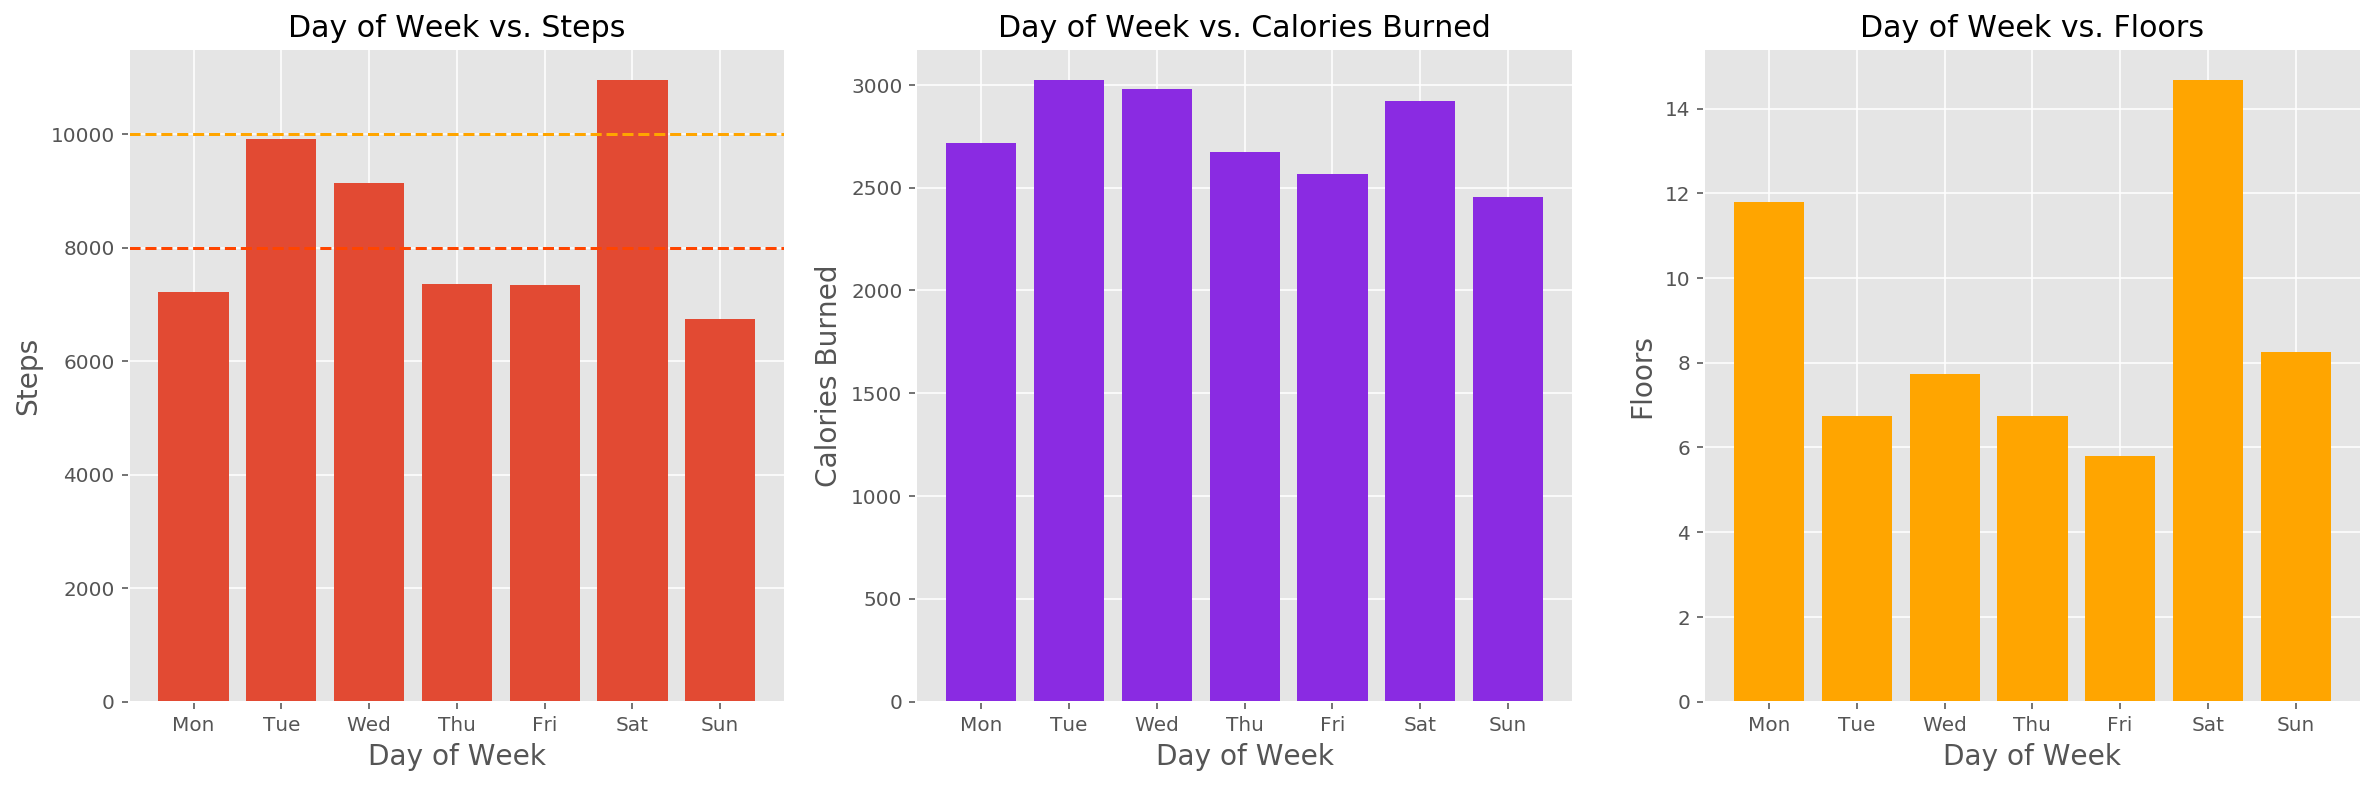

In [8]:
fig = plt.figure(figsize = (20,6))

ax = plt.subplot(131)  
plt.bar(dayGroupedData.index, dayGroupedData['Steps'])
plt.title('Day of Week vs. Steps', fontsize=15)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Steps', fontsize=14)
ax.axhline(8000, color="orangered", linestyle='--')
ax.axhline(10000, color="orange", linestyle='--')
ax.set_xticklabels(minDayCodes)

#############

ax2 = fig.add_subplot(132)
plt.bar(dayGroupedData.index, dayGroupedData['Calories Burned'], color='blueviolet')
plt.title('Day of Week vs. Calories Burned', fontsize=15)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Calories Burned', fontsize=14)
ax2.set_xticklabels(minDayCodes)

#############

ax3 = fig.add_subplot(133)
ax3.set_xticklabels(minDayCodes)
plt.bar(dayGroupedData.index, dayGroupedData['Floors'], color='orange')
plt.title('Day of Week vs. Floors', fontsize=15)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Floors', fontsize=14)
plt.show()

Instead of fussing more on the calories, I had kept a goal of attaining 8000 steps day for my device. From the looks of it, I am able to hit the goal. There are some studies which suggest hitting [10000](https://blog.fitbit.com/should-you-really-take-10000-steps-a-day/) [steps per day](https://www.huffingtonpost.ca/leigh-vanderloo/10000-steps-a-day_b_16077702.html). 

## 3. Active minutes

Observed least active minutes on Sunday 🛌
Observed most active minutes on Tuesday 🏃


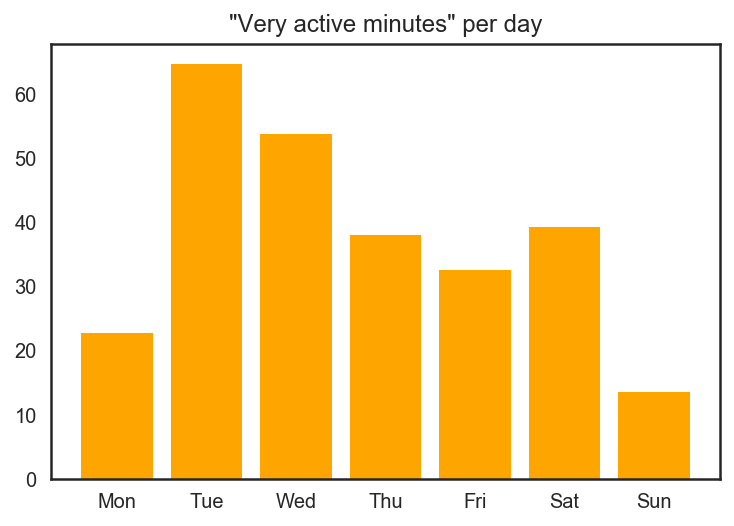

In [27]:
plt.bar(dayGroupedData.index, dayGroupedData['Minutes Very Active'], color='orange', tick_label=minDayCodes[1:])
plt.title('"Very active minutes" per day')

print("Observed least active minutes on {} 🛌".format(str(getDayLabel(dayGroupedData['Minutes Very Active'].idxmin()))))
print("Observed most active minutes on {} 🏃".format(str(getDayLabel(dayGroupedData['Minutes Very Active'].idxmax()))))

## Average heart rate / calorie burn rate per min / vs exercise type

,avgBPM,calories,maxBPM,steps,time,Cal/Min
type,,,,,,
Fitbit Coach,131.0,86.000000,149.0,5.0,10.000000,8.600000
Running,149.0,107.000000,183.0,1202.0,9.000000,11.825000
Squash,139.0,427.000000,170.0,4366.0,44.000000,9.704545
Swim,0.0,77.666667,0.0,97.0,20.333333,3.876400
Tennis,144.0,357.000000,176.0,2507.0,35.000000,10.200000
Walk,121.0,182.000000,164.0,2239.0,20.000000,9.100000


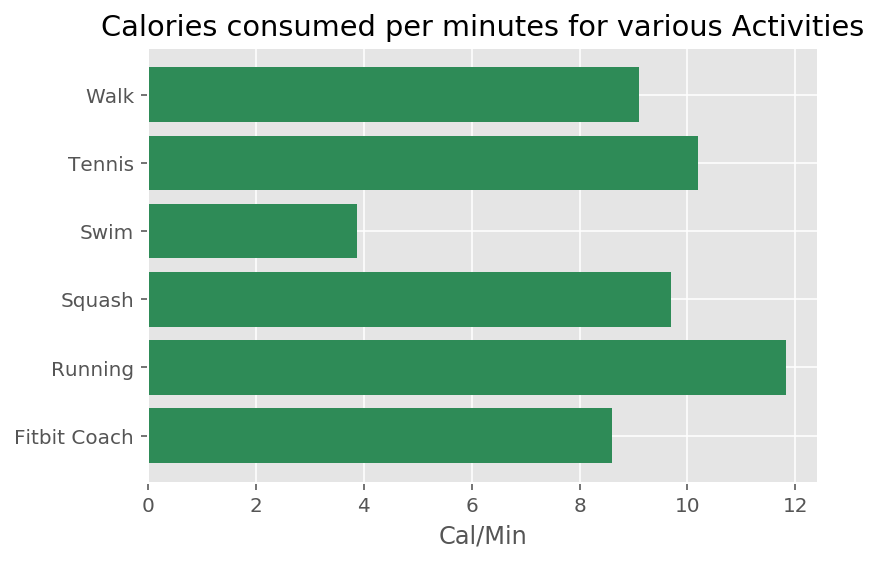

In [10]:
activityDf = pd.DataFrame([
    {'type': 'Running', 'time':10, 'avgBPM':149, 'calories':124},
    {'type': 'Running', 'time':8, 'avgBPM':149, 'maxBPM':183, 'calories':90, 'steps': 1202},
    {'type': 'Tennis', 'time':35, 'avgBPM':144, 'maxBPM':176, 'calories':357, 'steps': 2507},
    {'type': 'Squash', 'time':44, 'avgBPM':139, 'maxBPM':170, 'calories':427, 'steps': 4366},
    {'type': 'Swim', 'time':16, 'avgBPM':0, 'maxBPM':0, 'calories':71, 'steps': 91},
    {'type': 'Swim', 'time':22, 'avgBPM':0, 'maxBPM':0, 'calories':75, 'steps': 132},
    {'type': 'Swim', 'time':23, 'avgBPM':0, 'maxBPM':0, 'calories':87, 'steps': 68},
    {'type': 'Fitbit Coach', 'time':10, 'avgBPM':131, 'maxBPM':149, 'calories':86, 'steps': 5},
    {'type': 'Walk', 'time':20, 'avgBPM':121, 'maxBPM':164, 'calories':182, 'steps': 2239},
])
#skateboard,badminton, body weight ex, cyclinng
activityDf['Cal/Min'] = activityDf['calories']/activityDf['time']
groupedActivitiesDf = activityDf.groupby(['type']).mean()

#Plot Data
plt.barh(groupedActivitiesDf.index, groupedActivitiesDf['Cal/Min'], color='seagreen')
plt.title('Calories consumed per minutes for various Activities')
plt.xlabel('Cal/Min')
plt.plot()

groupedActivitiesDf

## 3. Calorie burn coorelation

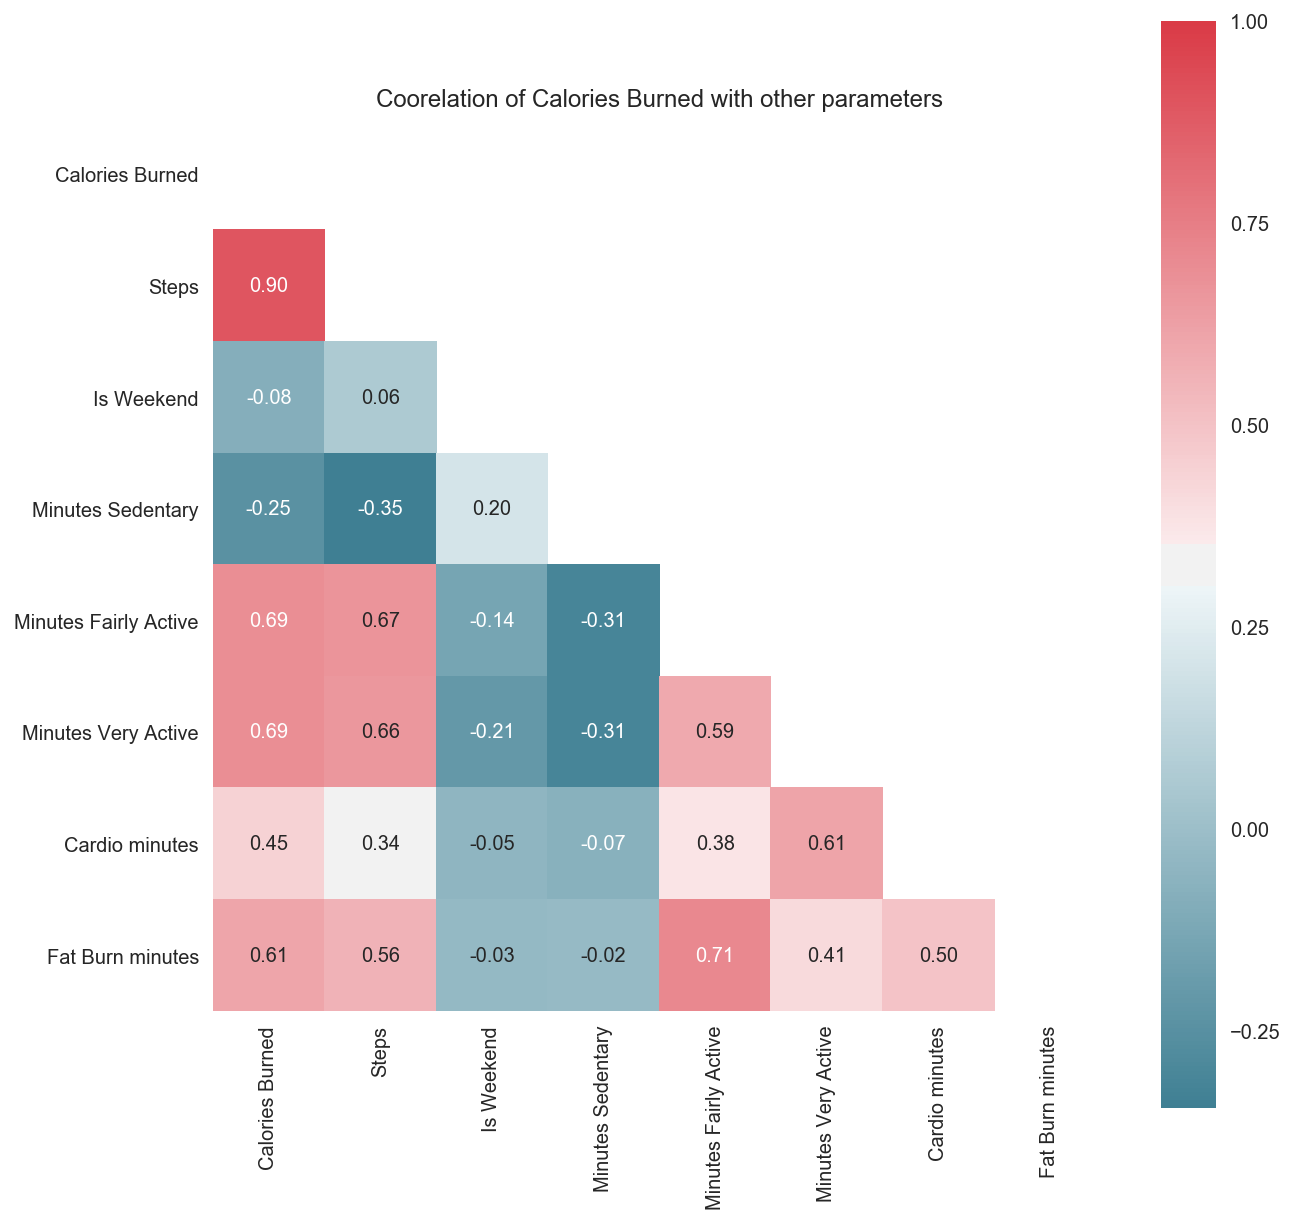

In [30]:
correlationOf = 'Calories Burned'
corrdf_calories = data[['Calories Burned','Steps', 'Is Weekend', 'Minutes Sedentary', 'Minutes Fairly Active', 'Minutes Very Active', 'Cardio minutes', 'Fat Burn minutes']]
plot_heatmap(corrdf_calories.corr(), correlationOf, 'Coorelation of {} with other parameters'.format(correlationOf))

---
# Sleep Analysis

## 1. How regular is my sleeping habits?

 - Am I getting the required hours of sleep? - Average sleep hours and the deviation
 - Am I following a good sleep schedule? - Average sleep and wake up timings

,count,mean,std,min,25%,50%,75%,max
Time in bed,69.0,7.135507,0.854013,3.65,6.883333,7.216667,7.45,9.566667


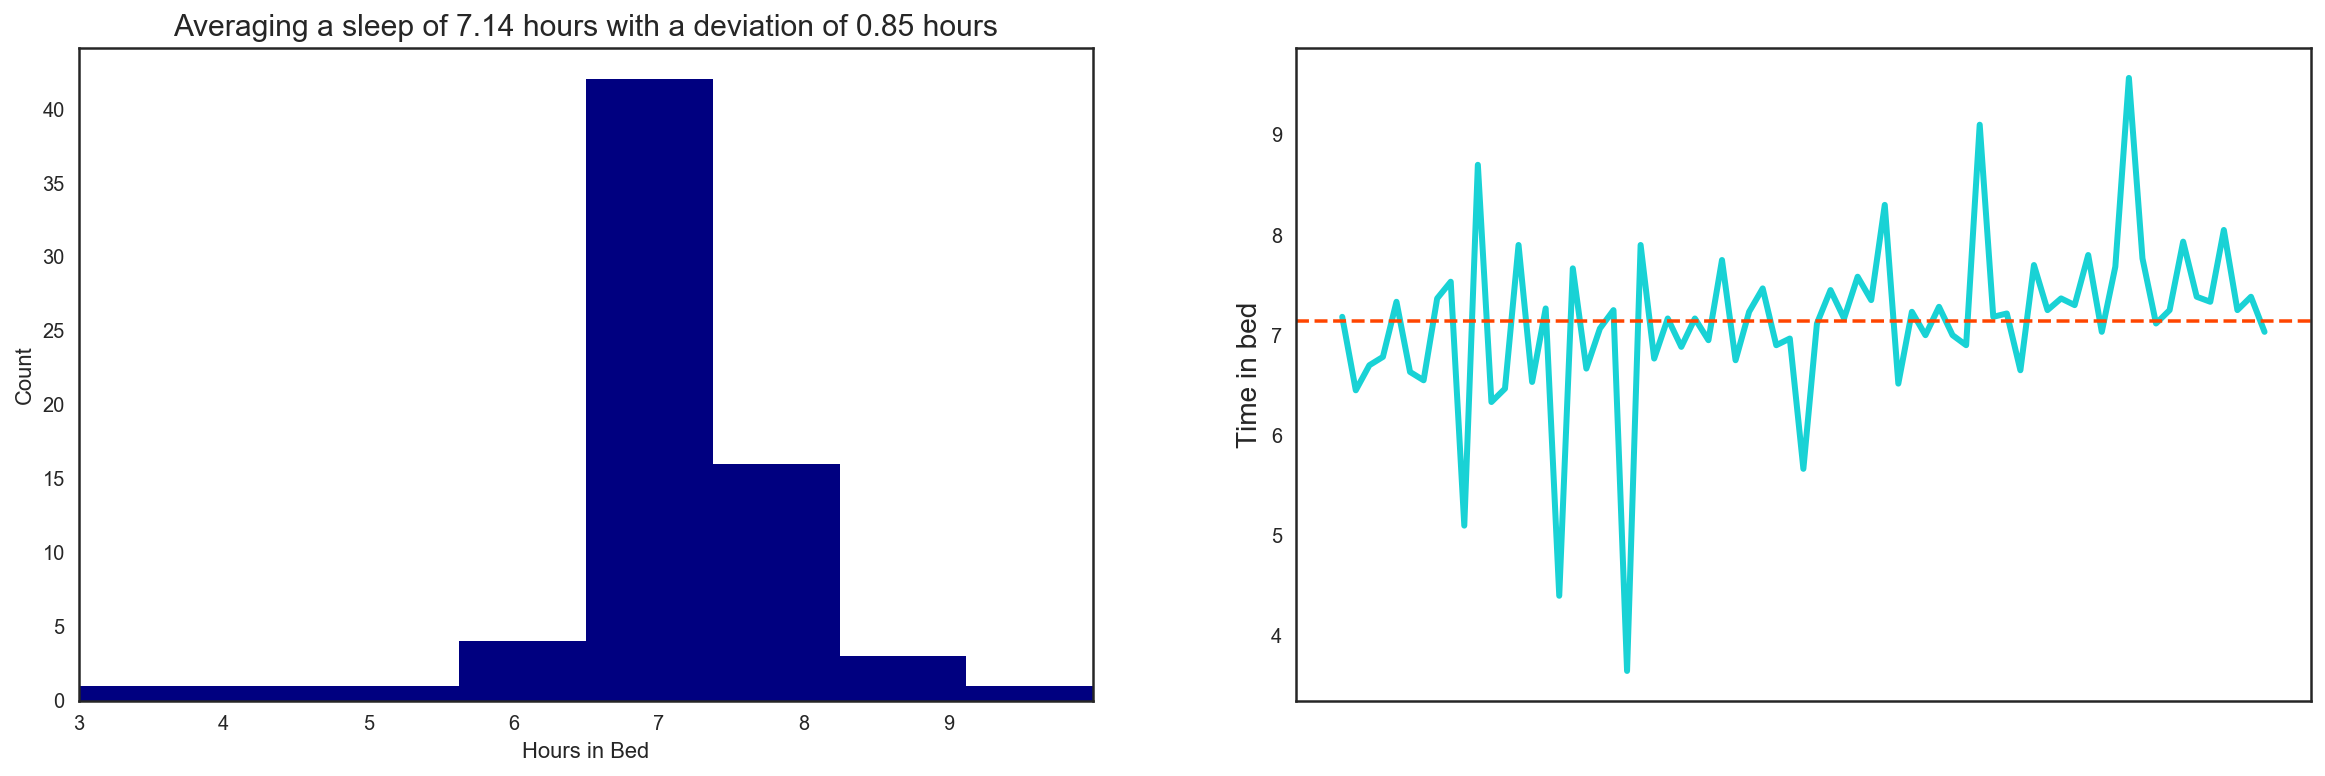

In [76]:
sleepDesc = hoursofSleep.describe().transpose()
avgSleepHours = round(sleepDesc.at['Time in bed','mean'],2)
summary = 'Averaging a sleep of {} hours with a deviation of {} hours'.format(avgSleepHours, round(sleepDesc.at['Time in bed','std'],2))
hoursInBed = sleepData['Time in bed']/60

fig = plt.figure(figsize = (20,6))

ax = plt.subplot(121)  
plt.hist(hoursInBed, bins = 8, range = (3, 10), color="navy")
plt.xlim(3, 10)
plt.xticks(range(3, 10))
plt.xlabel('Hours in Bed')
plt.ylabel('Count');
plt.title(summary, fontsize=15)

#############

ax2 = fig.add_subplot(122)
plt.plot(sleepData['Date'],hoursInBed, linestyle='-', 
         markersize=10, color='darkturquoise', label='% Light', linewidth=3.0, alpha=0.9)
plt.ylabel('Time in bed', fontsize=14)
ax2.axhline(avgSleepHours, color="orangered", linestyle='--')
plt.xticks([], [])
plt.plot()

sleepDesc

As far as behavioral data goes, this is reasonably well-behaved. Notice that this distribution doesn't vary much and is quite steep. The deviation is of less than an hour.

On the other note, according to [National Sleep Foundation](https://www.sleepfoundation.org/how-sleep-works/how-much-sleep-do-we-really-need/page/0/2) I should be getting sleep between 7-9 hours. Looks like barely scratching the mark here! 😅

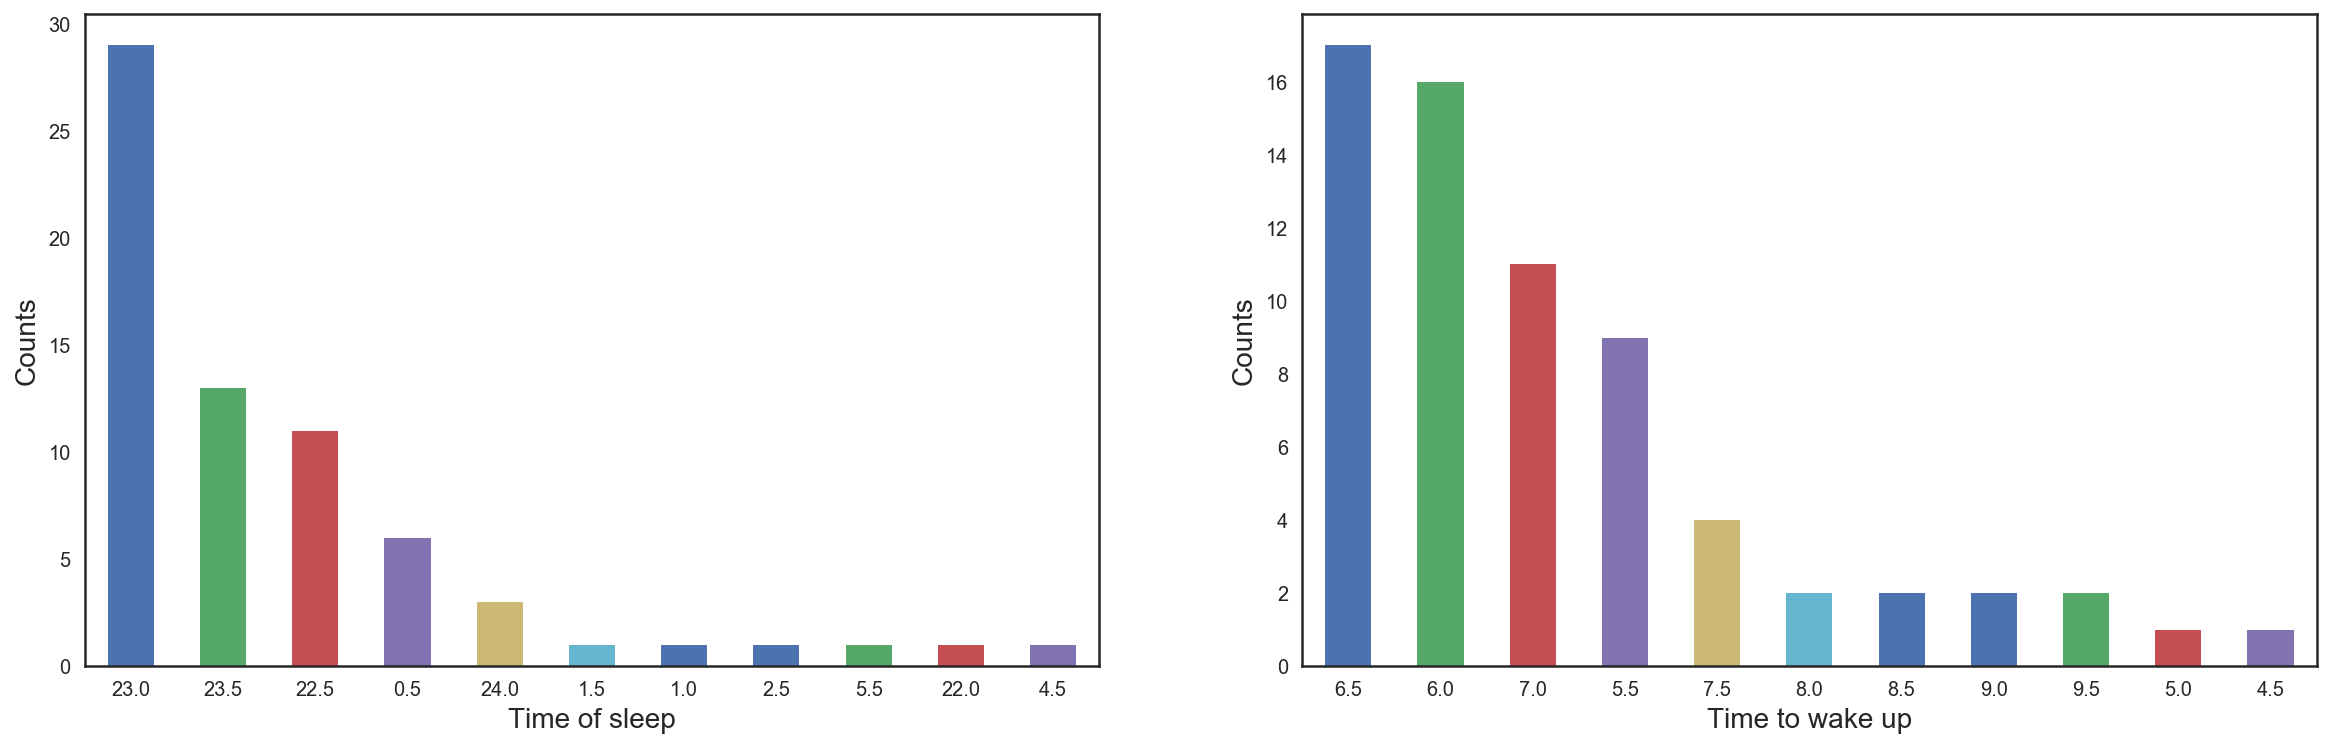

In [13]:
sleepBDF = sleepData[['Sleep Bucket', 'Awake Bucket', 'Time in bed']]
sleepBDF['Time in bed'] = sleepBDF['Time in bed']/60

#sleepBDF.groupby(['Sleep Bucket']).mean()
#sleepBDF.describe().transpose()

## plot the sleep and awake counts
fig = plt.figure(figsize = (20,6))

ax = plt.subplot(121)  
pd.value_counts(sleepData['Sleep Bucket']).plot.bar()
plt.xlabel('Time of sleep', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.xticks(rotation=0)

#############

ax2 = fig.add_subplot(122)
pd.value_counts(sleepData['Awake Bucket']).plot.bar()
plt.xlabel('Time to wake up', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.xticks(rotation=0)
plt.show()

#https://www.sleepfoundation.org/sleep-tools-tips/healthy-sleep-tips

## 2. Types of sleep

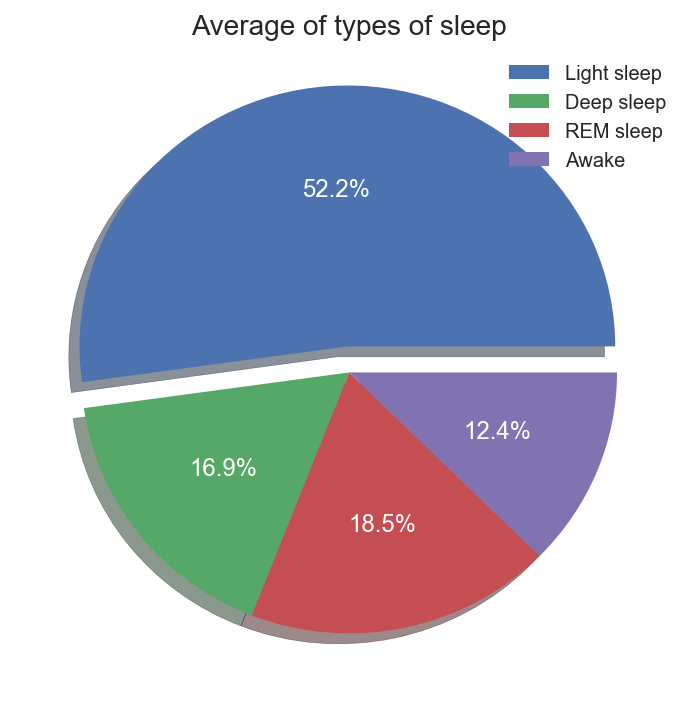

In [14]:
avgSleep = sleepData[['Minutes Light sleep', 'Minutes Deep sleep', 'Minutes REM sleep', 'Minutes Awake']].mean()

fig = plt.figure(figsize = (6,6))
explode = (0.1, 0, 0, 0)  # only "explode" the 1st slice
labels=['Light sleep', 'Deep sleep', 'REM sleep', 'Awake']
plt.pie(avgSleep, autopct='%1.1f%%', labels=labels, explode=explode, shadow=True, textprops=dict(color="w"))

# #carve the donut
# my_circle=plt.Circle( (0,0), 0.7, color='white')
# p=plt.gcf()
# p.gca().add_artist(my_circle)

plt.title('Average of types of sleep', fontsize=14)
plt.legend()
plt.show()

## 3. Correlation between amount of sleep and the sleep stages.
Do sleeping more will help me attain more deep or REM sleep?

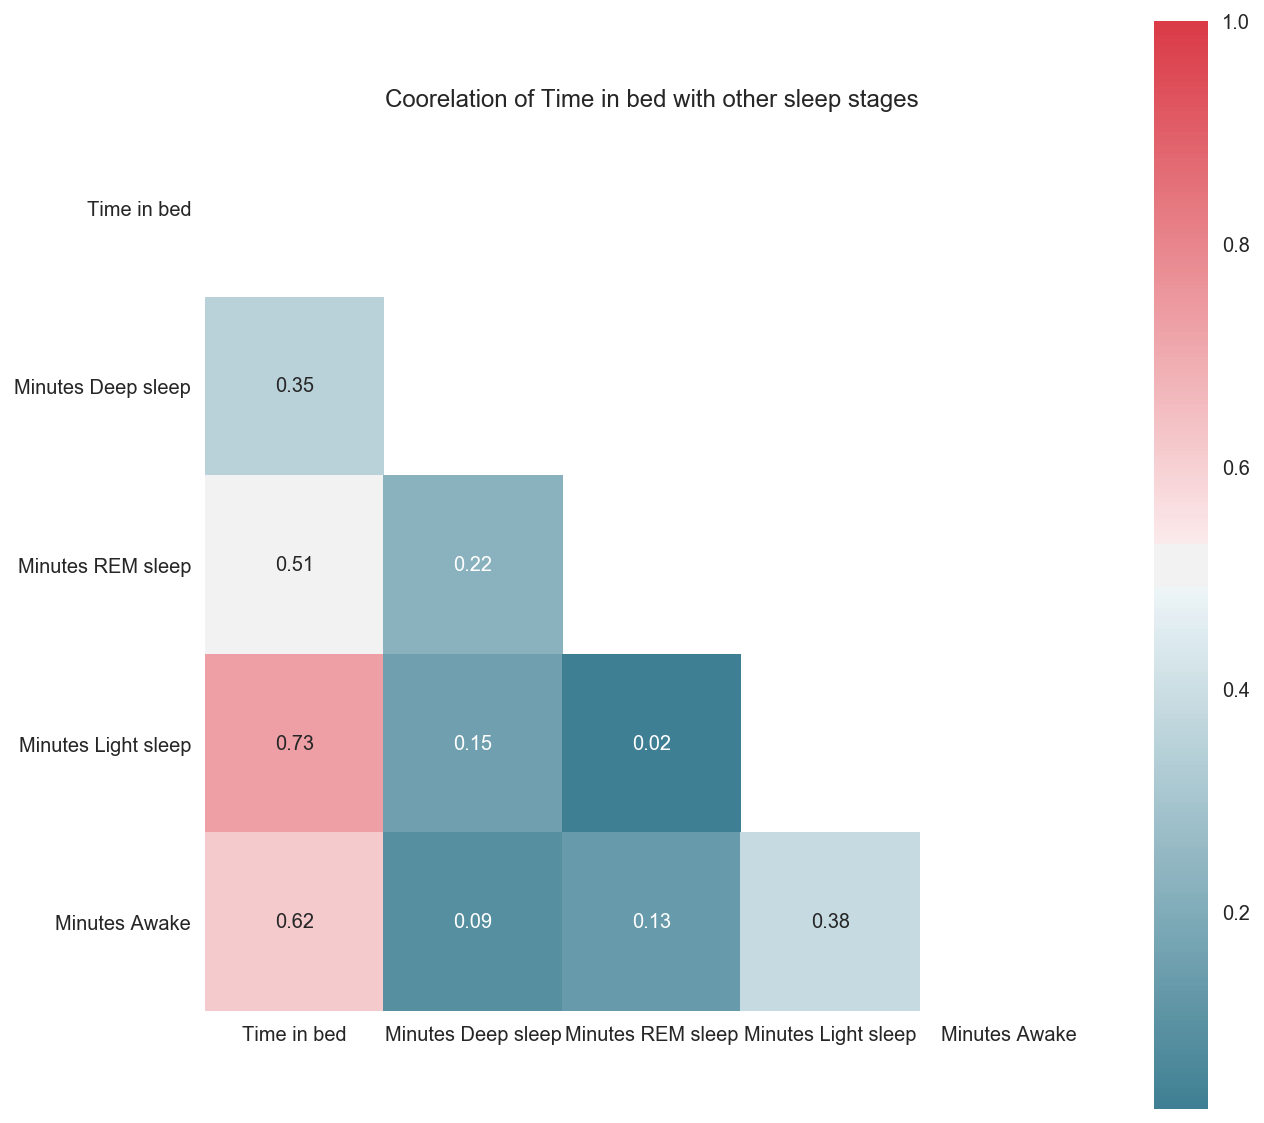

,Time in bed,Minutes Deep sleep,Minutes REM sleep,Minutes Light sleep,Minutes Awake
Time in bed,1.000000,0.349234,0.508851,0.732046,0.616285
Minutes Deep sleep,0.349234,1.000000,0.222683,0.153331,0.088011
Minutes REM sleep,0.508851,0.222683,1.000000,0.023480,0.130498
Minutes Light sleep,0.732046,0.153331,0.023480,1.000000,0.384258
Minutes Awake,0.616285,0.088011,0.130498,0.384258,1.000000


In [15]:
correlationOf = 'Time in bed'
corrdf_sleep_types = sleepData[['Time in bed', 'Minutes Deep sleep', 'Minutes REM sleep', 'Minutes Light sleep', 'Minutes Awake']].corr().abs()
plot_heatmap(corrdf_sleep_types, correlationOf, 'Coorelation of {} with other sleep stages'.format(correlationOf))
corrdf_sleep_types

Notice that the "Deep sleep minutes" are not very coorelated with the time in bed. 
Which shows that sleepinng more doesn't necessarily guarantee a good deep sleep.

## 4. Types of Sleep based on different days

Likely to get a more Restorative sleep on Wednesday 🛌


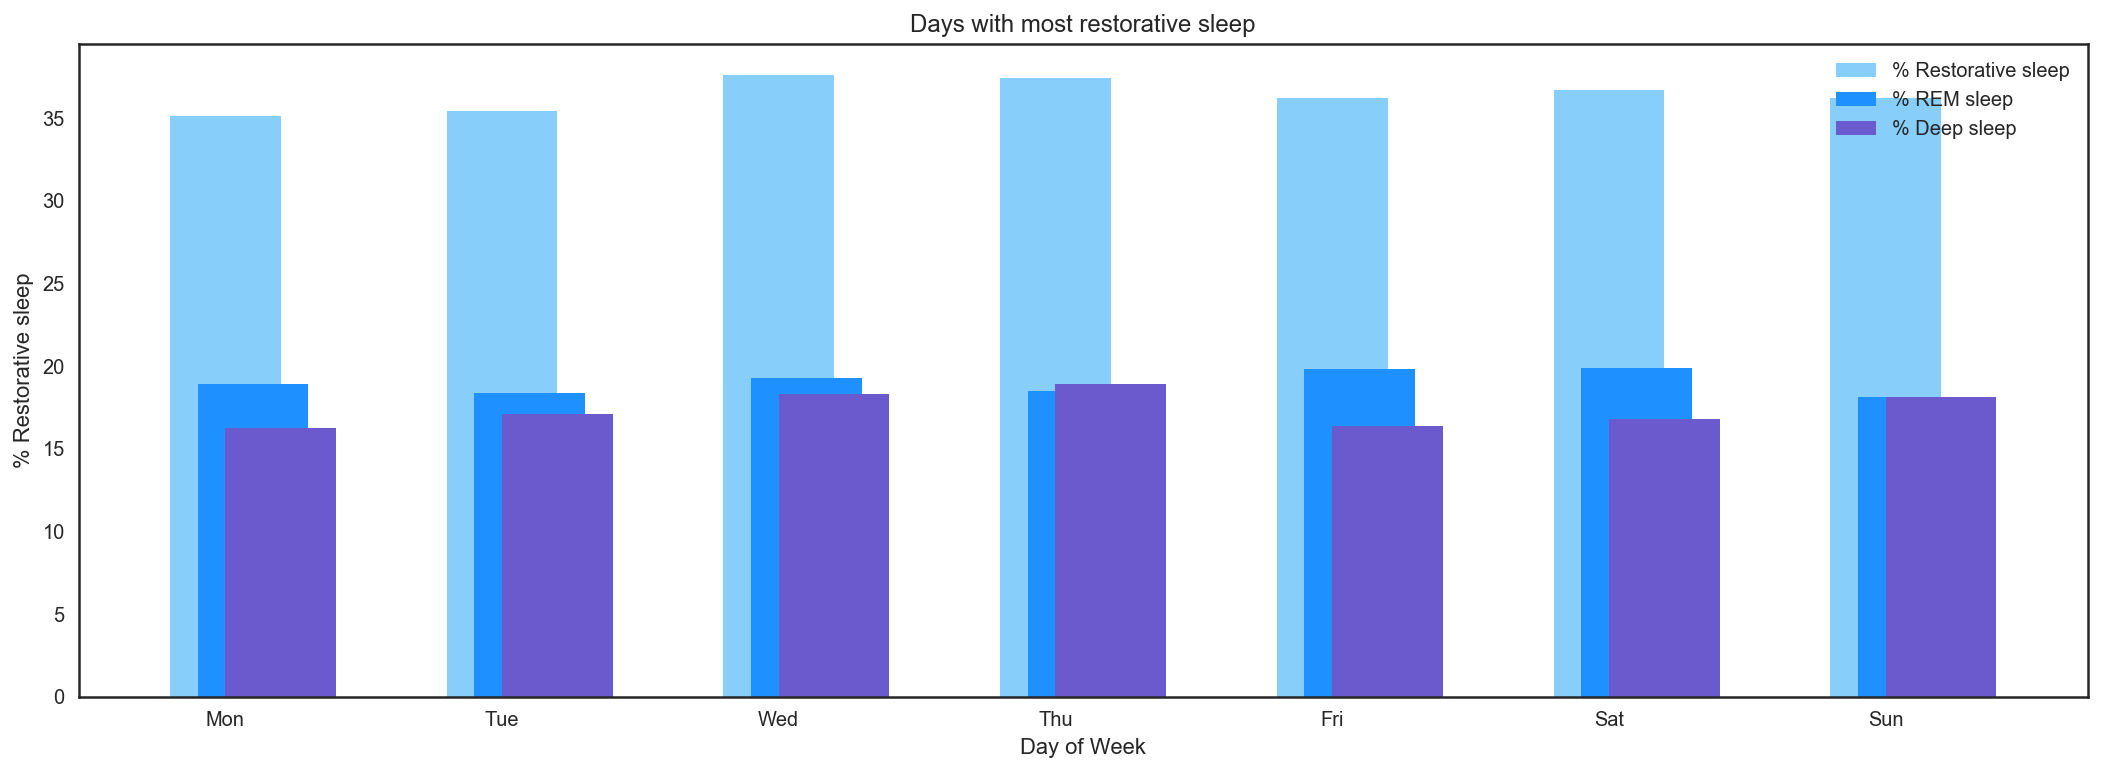

In [48]:
fig = plt.figure(figsize = (18,6))
plt.bar((dayGroupedData.index), dayGroupedData['% Restorative sleep'],width = 0.4, color='lightskyblue', label="% Restorative sleep", tick_label=minDayCodes[1:])
plt.bar((dayGroupedData.index + 0.1), dayGroupedData['% REM sleep'], width = 0.4, color='dodgerblue', label="% REM sleep")
plt.bar((dayGroupedData.index + 0.2), dayGroupedData['% Deep sleep'], width = 0.4, color='slateblue', label="% Deep sleep")
plt.title('Days with most restorative sleep')
plt.xlabel('Day of Week')
plt.ylabel('% Restorative sleep')
plt.legend()

print("Likely to get a more Restorative sleep on "+ str(getDayLabel(dayGroupedData['% Restorative sleep'].idxmax())) + ' 🛌')

Let's now look at the different days of the week. Did I sleep more on weekends? (I certainly hope so.) What nights were the worst? 

## Effect of Sleep on Weekdays 💼 vs Weekends 🎪

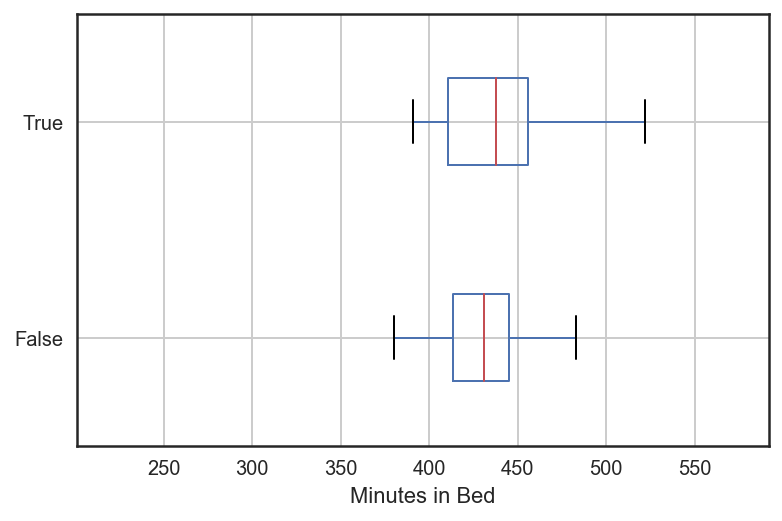

In [68]:
ax = sleepData.boxplot(column = 'Time in bed', by = 'Is Weekend', vert = False, widths = 0.4)
plt.xlabel('Minutes in Bed')
plt.suptitle('')
plt.title('');

The above plot shows that I tend to sleep a bit more on Weekends. The upper whisker is quite high for weekends 
indicatign varying sleep times.

What about individual days? We can consider each night of the week separately, and look at the distributions there.

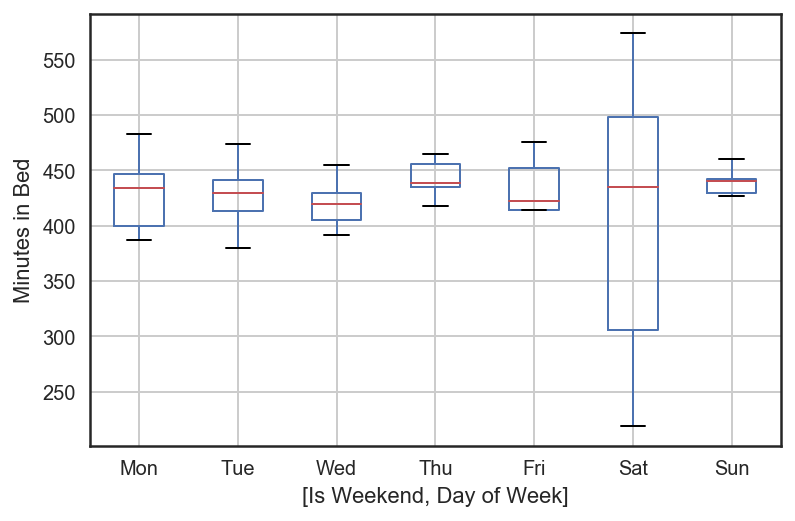

In [72]:
ax = sleepData.boxplot(column = 'Time in bed', by = ['Is Weekend','Day of Week'])
ax.set_xticklabels(minDayCodes[1:])
plt.ylabel('Minutes in Bed')
plt.suptitle('')
plt.title('');

This is very illustrative. Tuesdays, Thursdays, and Fridays were the days on which I got the least amount of sleep the previous night. Looking back on my quarter, I can find explanations for all of these -- Monday nights were extremely busy, and I could not start work until pretty late; Thursday mornings, I had to wake up earlier than usual to go to work, impacting my sleep the night before; and on Fridays, I had a quantum mechanics problem set due, which was too often put off to the night before. I find it extremely interesting to see my academic habits reflected in my sleep habits.

## Average Sleep and Wake times

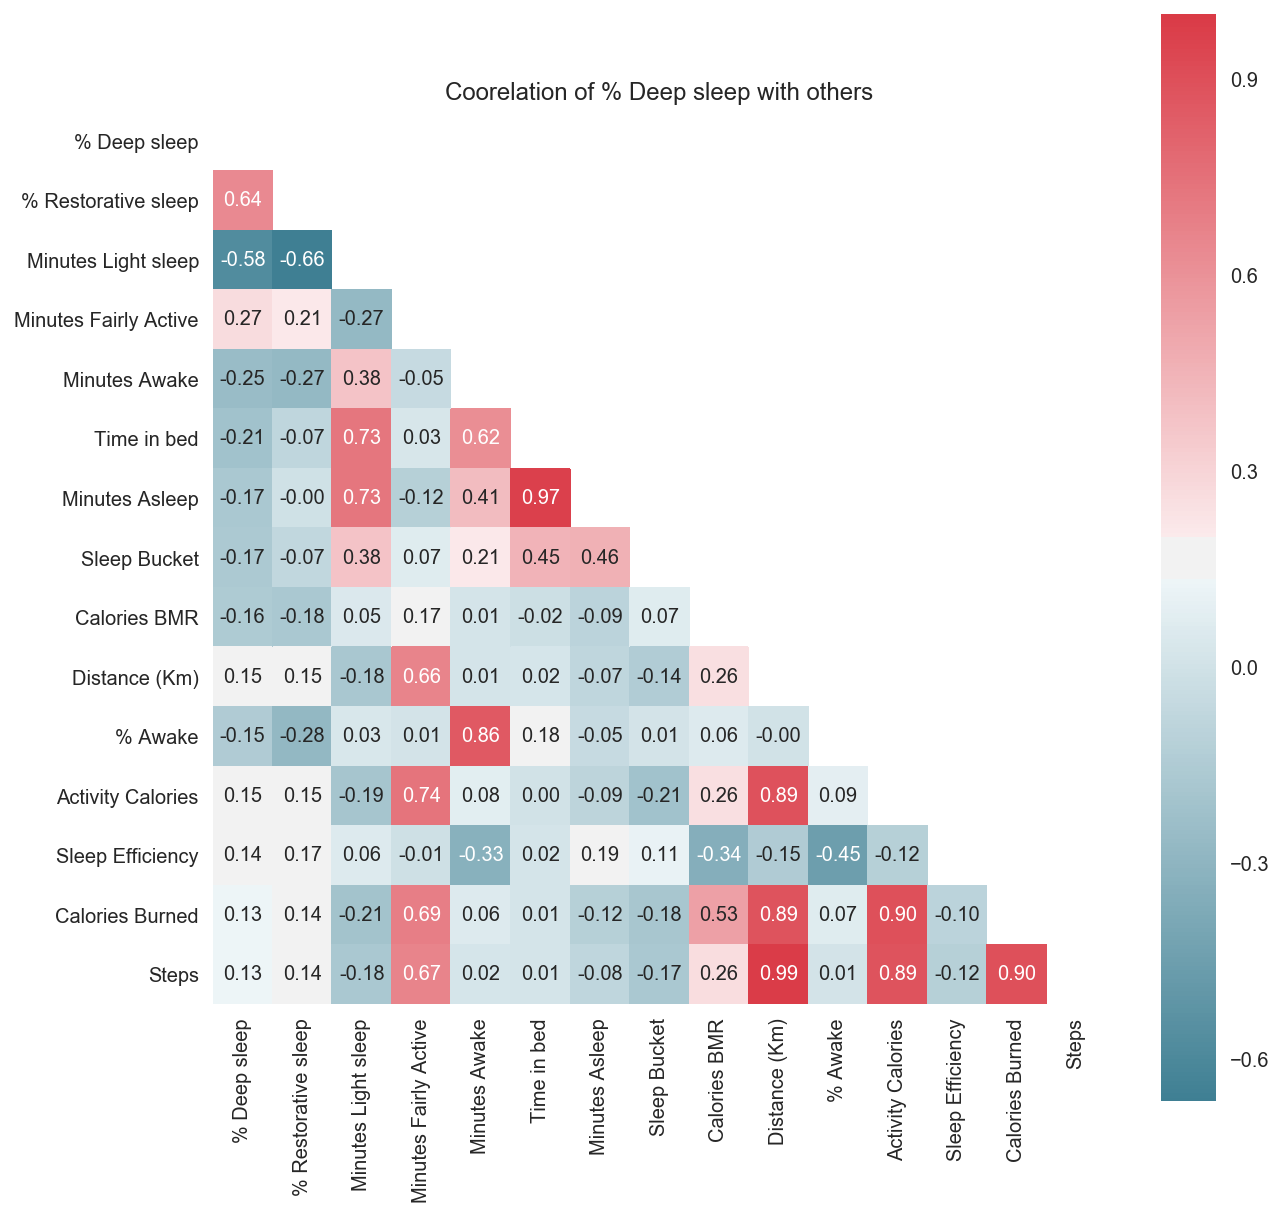

In [41]:
correlationOf="% Deep sleep"
k = 15 #number of variables for heatmap
corrmat = data.drop(['Days of Week', 'Minutes Deep sleep', '% Light sleep', '% REM sleep', 'REM sleep count', 'Deep sleep count', 'Light sleep count'], axis=1).corr().abs()
cols = corrmat.nlargest(k, correlationOf)[correlationOf].index

corrdf_sleep = data[cols]
plot_heatmap(corrdf_sleep.corr(), correlationOf, 'Coorelation of {} with others'.format(correlationOf), darkTheme=False)

In [85]:
sleepData['Sleep > 7'] = sleepData['Time in bed'] > 7*60
sleepData['Had exercise 50'] = sleepData['Minutes Very Active'] > 50
sleepData['Had exercise 60'] = sleepData['Minutes Very Active'] > 60
sleepData['Cardio minutes > 20'] = sleepData['Cardio minutes'] > 20

sleepData

,Date,Day of Week,Is Weekday,Is Weekend,Calories Burned,Calories BMR,Steps,Distance (Km),Elevation (Ft),Resting Heart Rate,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,Active Score,Cardio minutes,Cardio calories,Fat Burn minutes,Fat Burn calories,Peak minutes,Peak calories,Normal Cardio calories,Normal Cardio minutes,Sleep Efficiency,Minutes Asleep,Minutes to fall asleep,Sleep Start time,Sleep End time,Time in bed,Minutes Deep sleep,Deep sleep count,Minutes Light sleep,Light sleep count,Minutes REM sleep,REM sleep count,Minutes Awake,Minutes Awake count,% Deep sleep,% Light sleep,% REM sleep,Days of Week,Sleep Bucket,Awake Bucket,% Awake,% Restorative sleep,Achieved sleep time goal,Sleep > 6,Sleep > 7,Sleep > 8,Had exercise,Had exercise 50,Had exercise 60,Cardio minutes > 20,Cardio minutes > 30
0,2018-06-24,7,False,True,1996,1690,3367,3.01,0.00,59.0,0,1377,47,2,14,362,-1,11.0,133.10892,14.0,89.20880,0.0,0.00000,446.51352,284.0,92.0,379.0,0.0,2018-06-24T22:17:00.000,2018-06-25T05:28:30.000,431.0,56.0,2.0,244.0,26.0,79.0,6.0,52.0,25.0,13.0,57.0,19.0,Sun,22.5,5.5,11.0,32.0,True,True,True,False,False,False,False,False,False
1,2018-06-25,1,True,False,2863,1685,8394,5.55,36.58,58.0,12,709,244,42,14,1361,-1,2.0,12.40518,94.0,514.11279,0.0,0.00000,2311.92765,1326.0,95.0,333.0,0.0,2018-06-25T22:49:30.000,2018-06-26T05:16:30.000,387.0,75.0,3.0,214.0,27.0,44.0,7.0,54.0,30.0,20.0,56.0,12.0,Mon,23.0,5.5,12.0,32.0,False,True,False,False,False,False,False,False,False
2,2018-06-26,2,True,False,3398,1683,13569,9.68,24.38,57.0,8,687,231,33,102,2004,-1,10.0,103.59112,187.0,1245.54876,0.0,0.00000,2034.05724,1232.0,89.0,351.0,0.0,2018-06-26T22:25:30.000,2018-06-27T05:07:30.000,402.0,53.0,3.0,223.0,28.0,75.0,7.0,51.0,29.0,14.0,56.0,19.0,Tue,22.5,5.5,11.0,33.0,False,True,False,False,True,True,True,False,False
3,2018-06-27,3,True,False,3442,1682,13337,9.33,33.53,57.0,11,665,243,30,100,2035,-1,11.0,114.28908,217.0,1310.46804,0.0,0.00000,1986.03570,1187.0,97.0,365.0,0.0,2018-06-27T22:36:30.000,2018-06-28T05:24:00.000,407.0,66.0,4.0,197.0,32.0,102.0,10.0,42.0,32.0,17.0,49.0,26.0,Wed,23.0,5.5,8.0,43.0,False,True,False,False,True,True,True,False,False
7,2018-07-01,7,False,True,1718,1681,155,0.09,0.00,58.0,0,1427,13,0,0,46,-1,0.0,0.00000,1.0,3.97018,0.0,0.00000,233.77354,171.0,96.0,402.0,0.0,2018-07-01T22:34:00.000,2018-07-02T05:54:30.000,440.0,77.0,5.0,233.0,34.0,92.0,8.0,38.0,34.0,18.0,53.0,21.0,Sun,23.0,6.0,8.0,39.0,True,True,True,False,False,False,False,False,False
8,2018-07-02,1,True,False,2867,1681,7554,4.81,27.43,58.0,9,701,245,22,32,1372,-1,7.0,73.09176,92.0,558.11280,0.0,0.00000,2220.65844,1331.0,90.0,317.0,0.0,2018-07-02T23:54:30.000,2018-07-03T06:32:30.000,398.0,62.0,2.0,163.0,19.0,92.0,4.0,81.0,20.0,16.0,41.0,24.0,Mon,24.0,7.0,19.0,40.0,False,True,False,False,False,False,False,False,False
10,2018-07-04,3,True,False,3488,1681,14012,9.56,60.96,57.0,20,711,289,43,79,2136,-1,6.0,66.43075,158.0,1039.30850,2.0,26.61900,2321.80725,1247.0,90.0,333.0,0.0,2018-07-04T22:47:00.000,2018-07-05T05:20:30.000,393.0,58.0,4.0,223.0,27.0,52.0,6.0,60.0,27.0,15.0,57.0,14.0,Wed,23.0,5.5,14.0,29.0,False,True,False,False,True,True,True,False,False
11,2018-07-05,4,True,False,3833,1681,15603,11.62,24.38,56.0,8,634,249,36,128,2474,-1,49.0,548.37475,167.0,1105.62250,2.0,25.91850,2120.18000,1201.0,97.0,394.0,0.0,2018-07-05T22:36:00.000,2018-07-06T05:58:30.000,442.0,76.0,4.0,252.0,26.0,66.0,5.0,48.0,25.0,18.0,58.0,15.0,Thu,23.0,6.0,9.0,33.0,True,True,True,False,True,True,True,True,True
12,2018-07-06,5,True,False,3597,1681,14251,9.93,33.53,55.0,11,605,247,46,100,2230,-1,29.0,317.09300,148.0,986.07050,2.0,28.72050,2167.34700,1208.0,93.0,369.0,0.0,2018-07-06T22:29:30.000,2018-07-07T06:01:30.000,452.0,67.0,3.0,249.0,34.0,53.0,8.0,83.0,36.0,15.0,56.0,12.0,Fri,22.5,6.5,17.0,27.0,True,True,True,False,True,True,True,True,False
13,2018-07-07,6,False,True,3109,1681,12549,7.99,9.14,57.0,3,673,208,20,87,1682,-1,12.0,126.5461

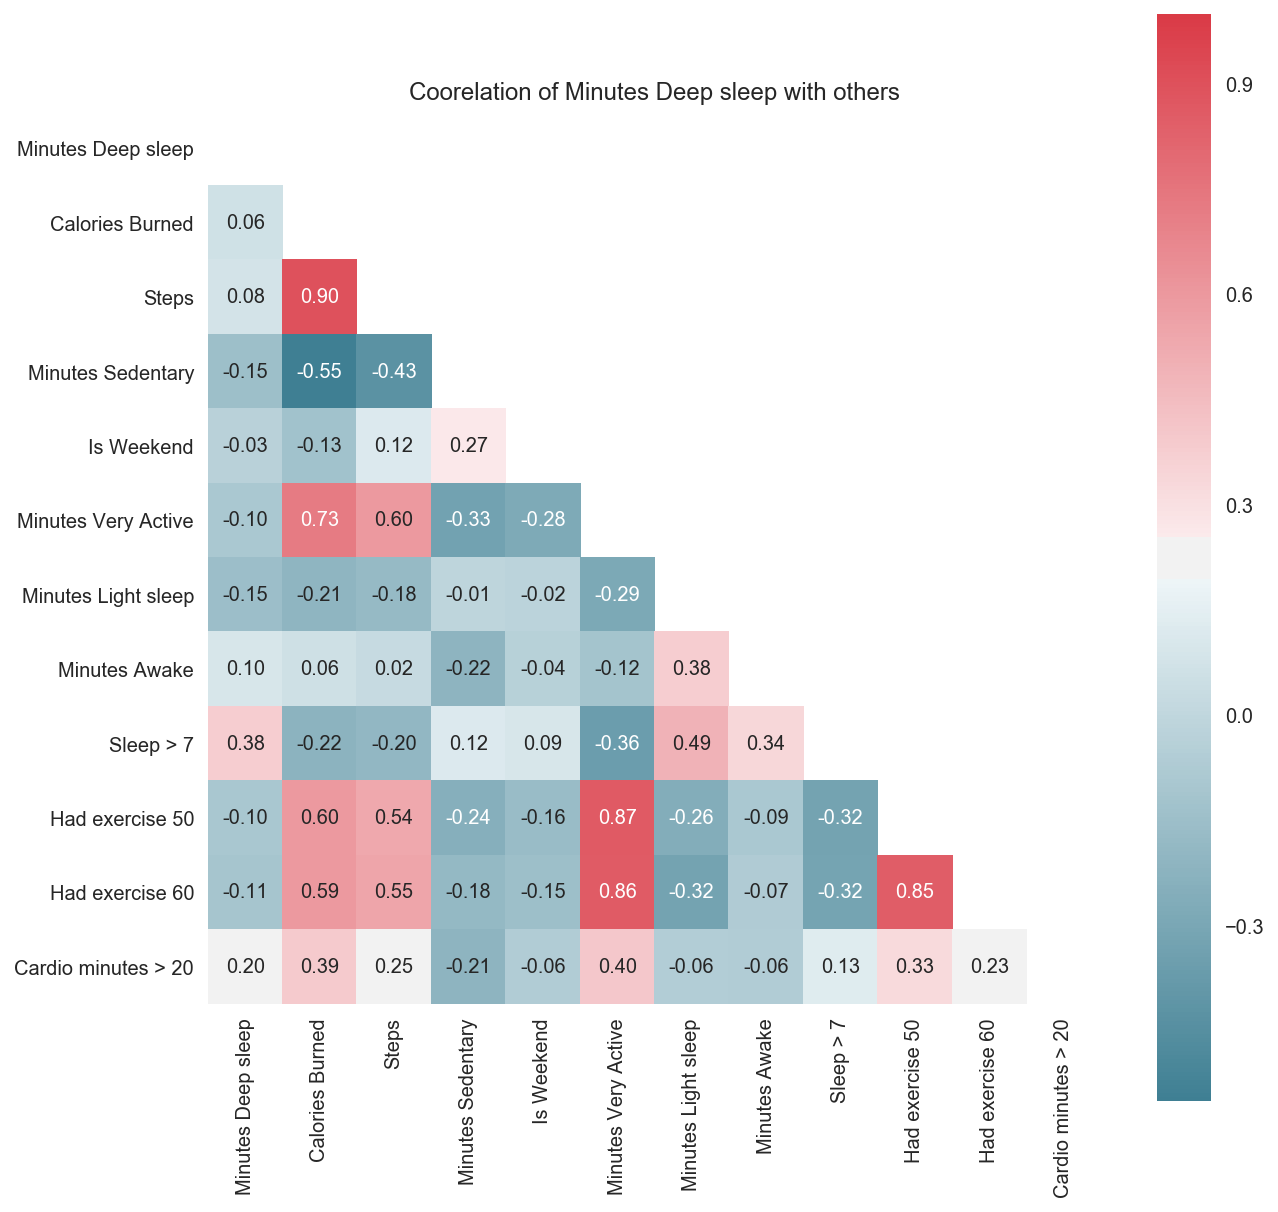

In [86]:
correlationOf = 'Minutes Deep sleep'
corrdf_calories = sleepData[['Minutes Deep sleep','Calories Burned','Steps', 'Minutes Sedentary', 'Is Weekend','Minutes Very Active', 'Minutes Light sleep', 'Minutes Awake', 'Sleep > 7', 'Had exercise 50', 'Had exercise 60', 'Cardio minutes > 20']]
plot_heatmap(corrdf_calories.corr(), correlationOf, 'Coorelation of {} with others'.format(correlationOf))

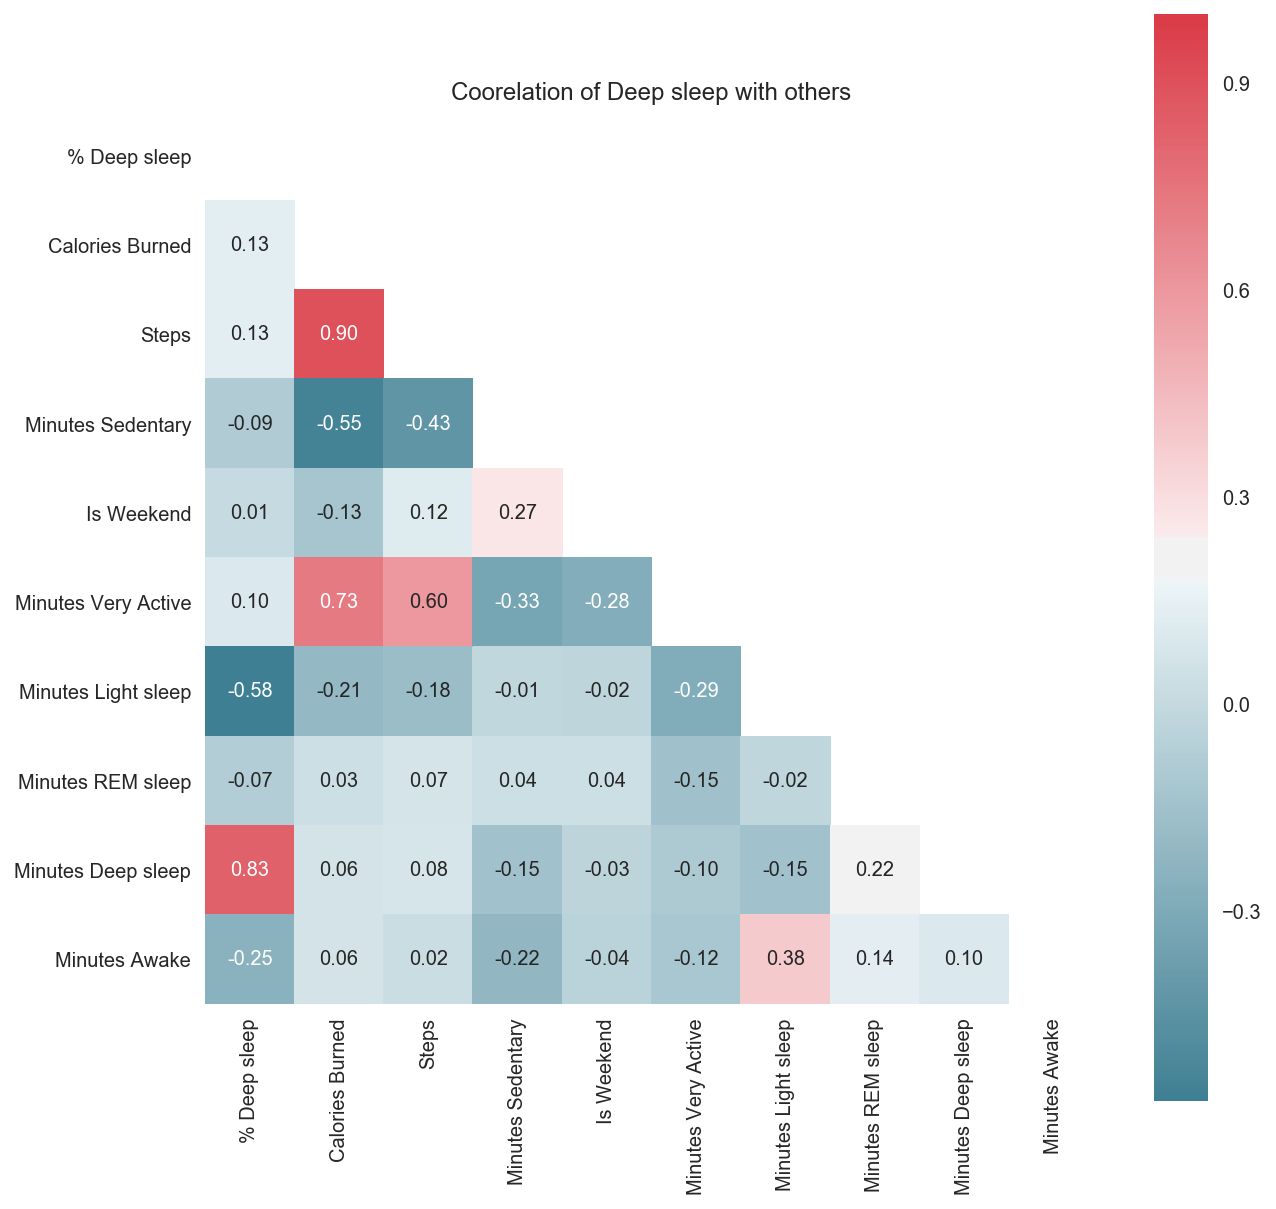

In [39]:
corrdf_calories = sleepData[['% Deep sleep', 'Calories Burned','Steps', 'Minutes Sedentary', 'Is Weekend','Minutes Very Active', 'Minutes Light sleep', 'Minutes REM sleep', 'Minutes Deep sleep', 'Minutes Awake']]
plot_heatmap(corrdf_calories.corr(), "", 'Coorelation of Deep sleep with others'.format(correlationOf))

## Machine Learning

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a15be1438>]],
      dtype=object)

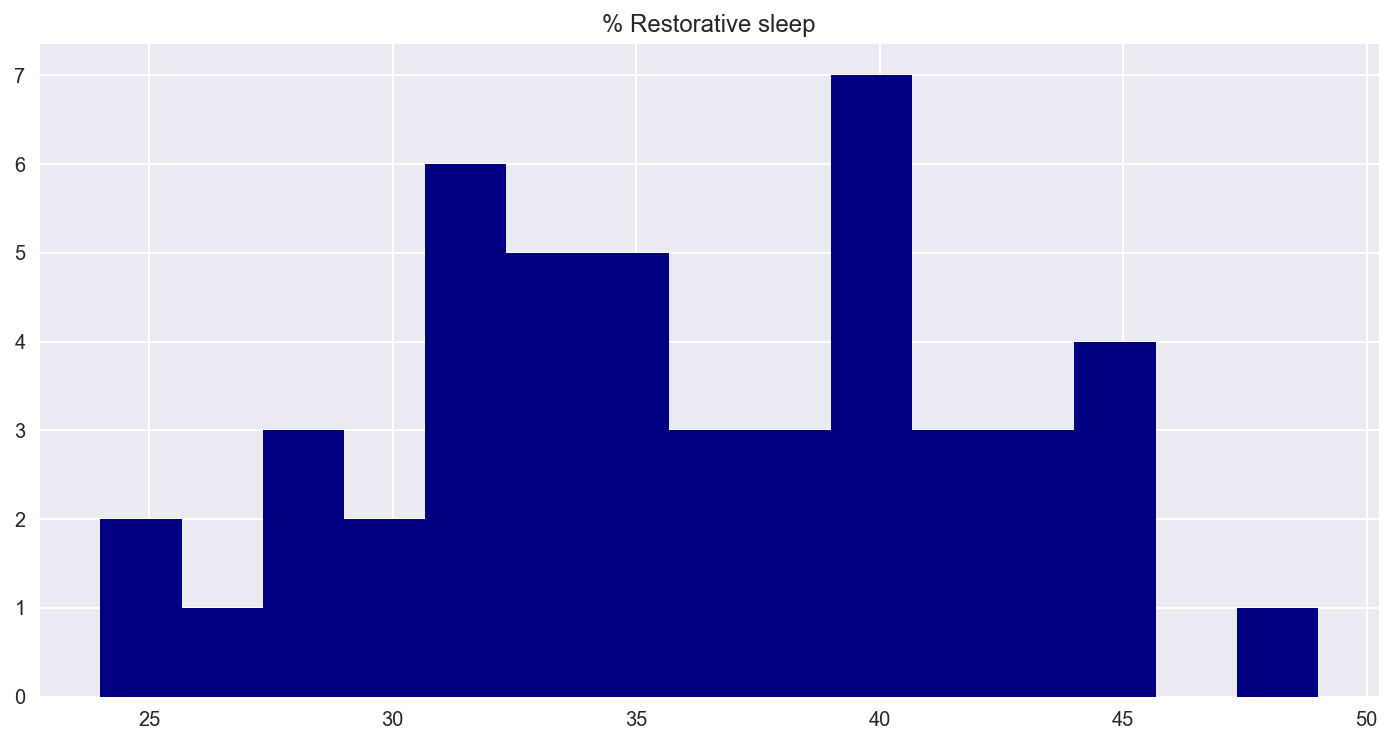

In [196]:
#sleepData['% Restorative sleep'].describe()
restorativeSleep = pd.DataFrame(sleepData['% Restorative sleep'])
restorativeSleep.hist(bins = 15, color="navy")

In [197]:
sleepData.head()

,Date,Day of Week,Is Weekday,Is Weekend,Calories Burned,Calories BMR,Steps,Distance (Km),Elevation (Ft),Resting Heart Rate,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,Active Score,Cardio Heart Rate minutes,Fat Burn Heart Rate minutes,Sleep Efficiency,Minutes Asleep,Minutes to fall asleep,Sleep Start time,Sleep End time,Time in bed,Minutes Deep sleep,Deep sleep count,Minutes Light sleep,Light sleep count,Minutes REM sleep,REM sleep count,Minutes Awake,Minutes Awake count,% Deep sleep,% Light sleep,% REM sleep,% Restorative sleep,Days of Week
0,2018-06-24,7,False,True,1996,1690,3367,3.01,0.00,59.0,0,1377,47,2,14,362,-1,11.0,14.0,92.0,379.0,0.0,2018-06-24T22:17:00.000,2018-06-25T05:28:30.000,431.0,56.0,2.0,244.0,26.0,79.0,6.0,52.0,25.0,13.0,57.0,19.0,32.0,Sun
1,2018-06-25,1,True,False,2863,1685,8394,5.55,36.58,58.0,12,709,244,42,14,1361,-1,2.0,94.0,95.0,333.0,0.0,2018-06-25T22:49:30.000,2018-06-26T05:16:30.000,387.0,75.0,3.0,214.0,27.0,44.0,7.0,54.0,30.0,20.0,56.0,12.0,32.0,Mon
2,2018-06-26,2,True,False,3398,1683,13569,9.68,24.38,57.0,8,687,231,33,102,2004,-1,10.0,187.0,89.0,351.0,0.0,2018-06-26T22:25:30.000,2018-06-27T05:07:30.000,402.0,53.0,3.0,223.0,28.0,75.0,7.0,51.0,29.0,14.0,56.0,19.0,33.0,Tue
3,2018-06-27,3,True,False,3442,1682,13337,9.33,33.53,57.0,11,665,243,30,100,2035,-1,11.0,217.0,97.0,365.0,0.0,2018-06-27T22:36:30.000,2018-06-28T05:24:00.000,407.0,66.0,4.0,197.0,32.0,102.0,10.0,42.0,32.0,17.0,49.0,26.0,43.0,Wed
7,2018-07-01,7,False,True,1718,1681,155,0.09,0.00,58.0,0,1427,13,0,0,46,-1,0.0,1.0,96.0,402.0,0.0,2018-07-01T22:34:00.000,2018-07-02T05:54:30.000,440.0,77.0,5.0,233.0,34.0,92.0,8.0,38.0,34.0,18.0,53.0,21.0,39.0,Sun


In [199]:
X = sleepData.drop(['Date', 'Sleep Start time', 'Sleep End time', 'Minutes Awake count', 'Active Score', 'Days of Week', 'Minutes Deep sleep', 'Minutes Light sleep', 'Minutes REM sleep', 'Minutes Awake', '% Deep sleep', '% Light sleep', '% REM sleep','% Restorative sleep', 'REM sleep count', 'Deep sleep count', 'Light sleep count'], axis=1)
X.fillna(X.mean(), inplace=True)
Y = sleepData['% Restorative sleep'] > 35

print('X shape: {}'.format(X.shape))
print('Y shape: {}'.format(Y.shape))

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)
print('X_train shape: {}. X_test shape: {}'.format(X_train.shape, X_test.shape))

X shape: (48, 21)
Y shape: (48,)
X_train shape: (33, 21). X_test shape: (15, 21)


In [ ]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import graphviz 


def trainAndPredict(classifier):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    print ("Accuracy : ",accuracy_score(y_test,y_pred)*100)
    print("Report : ",classification_report(y_test, y_pred))
    #print("Confusion Matrix: ",confusion_matrix(y_test, y_pred))
    return

def plotGraph(classifier):
    dot_data = tree.export_graphviz(classifier, out_file=None, 
                         feature_names=X.columns.values,  
                         class_names=['Yes', 'No'],                                
                         filled=True, rounded=True,  
                         special_characters=True)  
    graph = graphviz.Source(dot_data)  
    return graph

Accuracy :  80.0
Report :               precision    recall  f1-score   support

      False       0.67      1.00      0.80         6
       True       1.00      0.67      0.80         9

avg / total       0.87      0.80      0.80        15



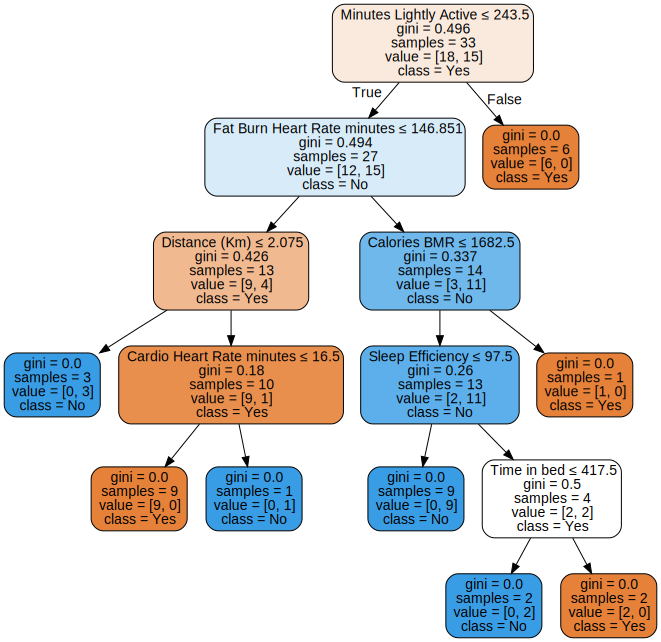

In [232]:
clf_gini_default = DecisionTreeClassifier(criterion = "gini")
trainAndPredict(clf_gini_default)
plotGraph(clf_gini_default)